In [10]:
# Loading the packages
import warnings
import pandas as pd
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import numpy as np
from datetime import datetime, timedelta
import csv
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import ccf

In [11]:
# Loading the input dataset
input = pd.read_csv("output\\input_full_interpolated.csv")
input.tail()

,datahora,nivel_87450004,nivel_87382000,nivel_87380000,nivel_87270000,nivel_87230000,nivel_87170000,nivel_87010000,nivel_86950000,nivel_86895000,...,acum12h_86881000,acum12h_86895000,acum12h_86950000,acum12h_87010000,acum12h_87170000,acum12h_87230000,acum12h_87270000,acum12h_87380000,acum12h_87382000,acum12h_87450004
4454,2024-05-07 09:00:00,527.0,725.0,747.39,901.0,780.0,998.0,163.0,1376.0,1230.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455,2024-05-07 10:00:00,528.0,723.0,746.50,901.0,777.0,998.0,163.0,1376.0,1227.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4456,2024-05-07 11:00:00,527.0,722.0,746.61,901.0,772.0,998.0,163.0,1376.0,1224.32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4457,2024-05-07 12:00:00,526.0,720.0,746.72,901.0,765.0,998.0,163.0,1376.0,1221.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4458,2024-05-07 13:00:00,526.0,719.0,745.83,901.0,759.0,998.0,163.0,1376.0,1218.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


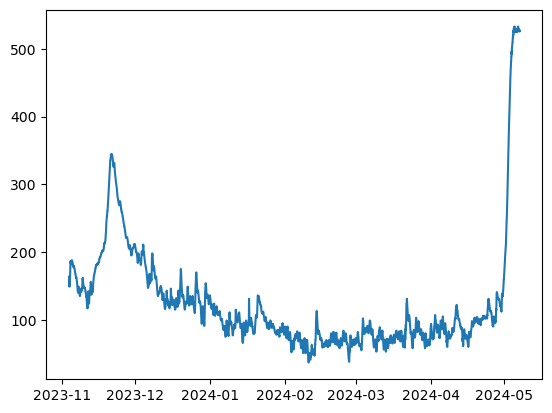

In [12]:
# Selecting the level at the outlet station
y = input[['datahora', 'nivel_87450004']]
y['datahora'] = pd.to_datetime(y['datahora'], format='%Y-%m-%d %H:%M:%S')

# Setting date and hour as the index
y = y.set_index('datahora', drop=True)

# Visualizing the series
plt.plot(y['nivel_87450004'])

In [13]:
# Splitting the dataset into train and test samples
test_size =int(len(y['nivel_87450004'].values)*0.9513)
X = y['nivel_87450004'].astype('float')
train, test = X[0:test_size], X[test_size:len(X)]
history24h = [x for x in train]
history12h = [x for x in train]
history6h = [x for x in train]
history1h = [x for x in train]
predictions24h = list()
predictions12h = list()
predictions6h = list()
predictions1h = list()
period = list()

In [15]:
# SARIMA model
# Fitting the model and forecasting in the test sample 1, 6, 12, and 24 steps ahead
for t in range(len(test)-24):
    model = ARIMA(history24h, order=(5,1,0), seasonal_order=(4, 1, 0, 12))
    model_fit = model.fit()
    output24h = model_fit.forecast(24)
    yhat24h = output24h[23]
    predictions24h.append(yhat24h)
    history24h.append(test.iloc[t])
    output12h = model_fit.forecast(12)
    yhat12h = output12h[11]
    predictions12h.append(yhat12h)
    history12h.append(test.iloc[t])
    output6h = model_fit.forecast(6)
    yhat6h = output6h[5]
    predictions6h.append(yhat6h)
    history6h.append(test.iloc[t])
    output1h = model_fit.forecast()
    yhat1h = output1h[0]
    predictions1h.append(yhat1h)
    history1h.append(test.iloc[t])
    obs,data = test.iloc[t+24],test.index[t+24]
    print('predicted24h=%f, expected24h=%f, period=%s' % (yhat24h, obs, data))

for t in range(12):
	model = ARIMA(history12h, order=(5,1,0), seasonal_order=(4, 1, 0, 12))
	model_fit = model.fit()
	output12h = model_fit.forecast(12)
	yhat12h = output12h[11]
	predictions12h.append(yhat12h)
	obs,data = test.iloc[len(test)-12+t],test.index[len(test)-12+t]
	history12h.append(test.iloc[len(test)-24+t])
	print('predicted=%f, expected=%f, period=%s' % (yhat12h, obs, data))

for t in range(18):
	model = ARIMA(history6h, order=(5,1,0), seasonal_order=(4, 1, 0, 12))
	model_fit = model.fit()
	output6h = model_fit.forecast(6)
	yhat6h = output6h[5]
	predictions6h.append(yhat6h)
	obs,data = test.iloc[len(test)-18+t],test.index[len(test)-18+t]
	history6h.append(test.iloc[len(test)-24+t])
	print('predicted=%f, expected=%f, period=%s' % (yhat6h, obs, data))

for t in range(23):
	model = ARIMA(history1h, order=(5,1,0), seasonal_order=(4, 1, 0, 12))
	model_fit = model.fit()
	output1h = model_fit.forecast(2)
	yhat1h = output1h[0]
	predictions1h.append(yhat1h)
	obs,data = test.iloc[len(test)-23+t],test.index[len(test)-23+t]
	history1h.append(test.iloc[len(test)-24+t])
	print('predicted=%f, expected=%f, period=%s' % (yhat1h, obs, data))

predicted24h=146.441948, expected24h=120.000000, period=2024-04-29 12:00:00
predicted24h=149.036449, expected24h=120.000000, period=2024-04-29 13:00:00
predicted24h=149.473908, expected24h=121.000000, period=2024-04-29 14:00:00
predicted24h=152.133230, expected24h=121.000000, period=2024-04-29 15:00:00
predicted24h=147.166817, expected24h=119.000000, period=2024-04-29 16:00:00
predicted24h=144.272112, expected24h=119.000000, period=2024-04-29 17:00:00
predicted24h=149.028273, expected24h=116.000000, period=2024-04-29 18:00:00
predicted24h=142.292037, expected24h=115.000000, period=2024-04-29 19:00:00
predicted24h=140.256174, expected24h=115.000000, period=2024-04-29 20:00:00
predicted24h=141.752031, expected24h=113.000000, period=2024-04-29 21:00:00
predicted24h=143.543798, expected24h=113.000000, period=2024-04-29 22:00:00
predicted24h=141.162331, expected24h=112.000000, period=2024-04-29 23:00:00
predicted24h=143.931183, expected24h=112.000000, period=2024-04-30 00:00:00
predicted24h

In [21]:
# Calculating RMSE for 1h, 6h, 12h, and 24h forecasts in the test sample
error1h = mean_squared_error(test.tail(-1), predictions1h)
RMSE1h = math.sqrt(error1h)

error6h = mean_squared_error(test.tail(-6), predictions6h)
RMSE6h = math.sqrt(error6h)

error12h = mean_squared_error(test.tail(-12), predictions12h)
RMSE12h = math.sqrt(error12h)

error24h = mean_squared_error(test.tail(-24), predictions24h)
RMSE24h = math.sqrt(error24h)

pd.DataFrame({'lead time' : ('1h', '6h', '12h', '24h'),
              'RMSE' : (RMSE1h, RMSE6h, RMSE12h, RMSE24h)
             })

,lead time,RMSE
0,1h,4.655127
1,6h,13.310104
2,12h,26.077349
3,24h,56.591077


In [28]:
# Saving the forecasts to csv
df_forecast24h = pd.DataFrame({'datahora': test.tail(-24).index, 'predicted24h': predictions24h})
df_forecast24h.reset_index(drop = True, inplace = True)
df_forecast12h = pd.DataFrame({'datahora': test.tail(-12).index, 'predicted12h': predictions12h})
df_forecast12h.reset_index(drop = True, inplace = True)
df_forecast6h = pd.DataFrame({'datahora': test.tail(-6).index, 'predicted6h': predictions6h})
df_forecast6h.reset_index(drop = True, inplace = True)
df_forecast1h = pd.DataFrame({'datahora': test.tail(-1).index, 'predicted1h': predictions1h})
df_forecast1h.reset_index(drop = True, inplace = True)
df_observed = pd.DataFrame({'datahora': test.index, 'observed': test})
df_observed.reset_index(drop = True, inplace = True)
forecast = df_observed.merge(df_forecast1h, on='datahora', how='left')
forecast = forecast.merge(df_forecast6h, on='datahora', how='left')
forecast = forecast.merge(df_forecast12h, on='datahora', how='left')
forecast = forecast.merge(df_forecast24h, on='datahora', how='left')
forecast = forecast.round(2)
forecast.to_csv("output\\sarima_1-6-12-24-stepAhead_insideSample.csv", index = False)

In [25]:
# Resetting the train sample
history24h2 = [x for x in train]
history12h2 = [x for x in train]
history6h2 = [x for x in train]
history1h2 = [x for x in train]
predictions24h2 = list()
predictions12h2 = list()
predictions6h2 = list()
predictions1h2 = list()
period2 = list()

In [26]:
# ARIMA model
# Fitting the model and forecasting in the test sample 1, 6, 12, and 24 steps ahead
for t in range(len(test)-24):
    model2 = ARIMA(history24h2, order=(12,1,0))
    model_fit2 = model2.fit()
    output24h2 = model_fit2.forecast(24)
    yhat24h2 = output24h2[23]
    predictions24h2.append(yhat24h2)
    history24h2.append(test.iloc[t])
    output12h2 = model_fit2.forecast(12)
    yhat12h2 = output12h2[11]
    predictions12h2.append(yhat12h2)
    history12h2.append(test.iloc[t])
    output6h2 = model_fit2.forecast(6)
    yhat6h2 = output6h2[5]
    predictions6h2.append(yhat6h2)
    history6h2.append(test.iloc[t])
    output1h2 = model_fit2.forecast()
    yhat1h2 = output1h2[0]
    predictions1h2.append(yhat1h2)
    history1h2.append(test.iloc[t])
    obs2,data2 = test.iloc[t+24],test.index[t+24]
    print('predicted24h=%f, expected24h=%f, period=%s' % (yhat24h2, obs2, data2))

for t in range(12):
	model2 = ARIMA(history12h2, order=(12,1,0))
	model_fit2 = model2.fit()
	output12h2 = model_fit2.forecast(12)
	yhat12h2 = output12h2[11]
	predictions12h2.append(yhat12h2)
	obs2,data2 = test.iloc[len(test)-12+t],test.index[len(test)-12+t]
	history12h2.append(test.iloc[len(test)-24+t])
	print('predicted=%f, expected=%f, period=%s' % (yhat12h2, obs2, data2))

for t in range(18):
	model2 = ARIMA(history6h2, order=(12,1,0))
	model_fit2 = model2.fit()
	output6h2 = model_fit2.forecast(6)
	yhat6h2 = output6h2[5]
	predictions6h2.append(yhat6h2)
	obs2,data2 = test.iloc[len(test)-18+t],test.index[len(test)-18+t]
	history6h2.append(test.iloc[len(test)-24+t])
	print('predicted=%f, expected=%f, period=%s' % (yhat6h2, obs2, data2))

for t in range(23):
	model2 = ARIMA(history1h2, order=(12,1,0))
	model_fit2 = model2.fit()
	output1h2 = model_fit2.forecast(2)
	yhat1h2 = output1h2[0]
	predictions1h2.append(yhat1h2)
	obs2,data2 = test.iloc[len(test)-23+t],test.index[len(test)-23+t]
	history1h2.append(test.iloc[len(test)-24+t])
	print('predicted=%f, expected=%f, period=%s' % (yhat1h2, obs2, data2))

predicted24h=132.607274, expected24h=120.000000, period=2024-04-29 12:00:00
predicted24h=133.943947, expected24h=120.000000, period=2024-04-29 13:00:00
predicted24h=134.151960, expected24h=121.000000, period=2024-04-29 14:00:00
predicted24h=134.074395, expected24h=121.000000, period=2024-04-29 15:00:00
predicted24h=132.134890, expected24h=119.000000, period=2024-04-29 16:00:00
predicted24h=132.378267, expected24h=119.000000, period=2024-04-29 17:00:00
predicted24h=133.852357, expected24h=116.000000, period=2024-04-29 18:00:00
predicted24h=131.397701, expected24h=115.000000, period=2024-04-29 19:00:00
predicted24h=131.781875, expected24h=115.000000, period=2024-04-29 20:00:00
predicted24h=129.635968, expected24h=113.000000, period=2024-04-29 21:00:00
predicted24h=130.353364, expected24h=113.000000, period=2024-04-29 22:00:00
predicted24h=130.567999, expected24h=112.000000, period=2024-04-29 23:00:00
predicted24h=132.120813, expected24h=112.000000, period=2024-04-30 00:00:00
predicted24h

In [27]:
# Calculating RMSE for 1h, 6h, 12h, and 24h forecasts in the test sample
error1h2 = mean_squared_error(test.tail(-1), predictions1h2)
RMSE1h2 = math.sqrt(error1h2)

error6h2 = mean_squared_error(test.tail(-6), predictions6h2)
RMSE6h2 = math.sqrt(error6h2)

error12h2 = mean_squared_error(test.tail(-12), predictions12h2)
RMSE12h2 = math.sqrt(error12h2)

error24h2 = mean_squared_error(test.tail(-24), predictions24h2)
RMSE24h2 = math.sqrt(error24h2)

pd.DataFrame({'lead time' : ('1h', '6h', '12h', '24h'),
              'RMSE' : (RMSE1h2, RMSE6h2, RMSE12h2, RMSE24h2)
             })

,lead time,RMSE
0,1h,5.183672
1,6h,19.000855
2,12h,40.090331
3,24h,75.715445


In [29]:
# Saving the forecasts to csv
df_forecast24h2 = pd.DataFrame({'datahora': test.tail(-24).index, 'predicted24h': predictions24h2})
df_forecast24h2.reset_index(drop = True, inplace = True)
df_forecast12h2 = pd.DataFrame({'datahora': test.tail(-12).index, 'predicted12h': predictions12h2})
df_forecast12h2.reset_index(drop = True, inplace = True)
df_forecast6h2 = pd.DataFrame({'datahora': test.tail(-6).index, 'predicted6h': predictions6h2})
df_forecast6h2.reset_index(drop = True, inplace = True)
df_forecast1h2 = pd.DataFrame({'datahora': test.tail(-1).index, 'predicted1h': predictions1h2})
df_forecast1h2.reset_index(drop = True, inplace = True)
df_observed2 = pd.DataFrame({'datahora': test.index, 'observed': test})
df_observed2.reset_index(drop = True, inplace = True)
forecast2 = df_observed2.merge(df_forecast1h2, on='datahora', how='left')
forecast2 = forecast2.merge(df_forecast6h2, on='datahora', how='left')
forecast2 = forecast2.merge(df_forecast12h2, on='datahora', how='left')
forecast2 = forecast2.merge(df_forecast24h2, on='datahora', how='left')
forecast2 = forecast2.round(2)
forecast2.to_csv("output\\arima_1-6-12-24-stepAhead_insideSample.csv", index = False)